In [29]:
import pandas as pd
import re
from langdetect import detect

# 컬럼명 없이 텍스트만 있는 CSV 파일 읽기
df = pd.read_csv('.data/kpop_audience_reviews.csv')
print(f"전체 리뷰: {len(df)}개")

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"영어 리뷰: {len(df)}개")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\n첫 10개 샘플:")
print(df_review.head(10))

전체 리뷰: 845개
영어 리뷰: 797개

첫 10개 샘플:
                                          review_text
0                      this the best 2025 movie ever 
1   so fun! artistic, creative, great music and ch...
2             banger music, an actual netflix banger 
3                         was amazing love the songs 
4   recently saw this on netflix with my girlfrien...
5   pretty good film the animation is brilliant as...
6                         amazing, must watch movie. 
7   hate this movie, terrible humor, terribly char...
8             love it !!!!! i love the saja boys !!! 
10  we loved the whole experience! singing along w...


In [30]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

,review_text
0,this the best 2025 movie ever
1,so fun artistic creative great music and chara...
2,banger music an actual netflix banger
3,was amazing love the songs
4,recently saw this on netflix with my girlfrien...
5,pretty good film the animation is brilliant as...
6,amazing must watch movie
7,hate this movie terrible humor terribly charac...
8,love it i love the saja boys
10,we loved the whole experience singing along wi...


In [31]:
print(f"총 리뷰 수: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

총 리뷰 수: 797
empty_reviews : 0


In [32]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(10))

여러 공백이 있는 리뷰: 95개
예시:
8                       love it  i love the saja boys  
21           you like a singalong you might like this  
25                                 8th time seeing it  
47                9  10 i love the song of this movie  
48    let me be clear this definitely was not someth...
54    such an impeccable film  just so so good for a...
65    looking forward for rumi and jinu to get toget...
69    its not my favorite music genre but you can fe...
76    an unexpected gem a review of kpop demon hunte...
91    at first  i thought it was just gonna be an or...
Name: review_text, dtype: object


In [33]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(3))

여러 공백이 있는 리뷰: 95개
예시:
8                love it  i love the saja boys  
21    you like a singalong you might like this  
25                          8th time seeing it  
Name: review_text, dtype: object


In [34]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"앞 공백: {leading_spaces.sum()}개")
if leading_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[leading_spaces]['review_text'])

앞 공백: 1개

앞 공백이 있는 리뷰:
513     turned my bedroom into a bts concert 
Name: review_text, dtype: object


In [35]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"뒤 공백: {trailing_spaces.sum()}개")
if trailing_spaces.sum() > 0:
    print("\n뒤 공백이 있는 리뷰:")
    print(df_review[trailing_spaces]['review_text'])

뒤 공백: 0개


In [36]:
both_spaces = leading_spaces | trailing_spaces
print(f"앞뒤 공백 총: {both_spaces.sum()}개")
if both_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[both_spaces]['review_text'])

앞뒤 공백 총: 1개

앞 공백이 있는 리뷰:
513     turned my bedroom into a bts concert 
Name: review_text, dtype: object


In [37]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [38]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"제거 후: {both_spaces.sum()}개")

제거 후: 0개


In [39]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"단어 1-2개 리뷰: {(min_words < 3).sum()}개")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [40]:
# import os
# from pathlib import Path
# from datetime import datetime

# # 현재 작업 디렉토리 확인
# print(f"현재 작업 디렉토리: {os.getcwd()}")

# # 저장 경로를 명시적으로 지정
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # 데이터프레임 저장
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM 추가로 Excel 호환성 개선
#     print(f"✅ 전처리 완료 및 저장: {output_path}")
#     print(f"📊 저장된 행 수: {len(df_review)}")
# except Exception as e:
#     print(f"❌ 저장 실패: {e}")
#     # 대안: 홈 디렉토리에 저장
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"✅ 대체 경로에 저장: {home_path}")

In [41]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                          review_text  \
0                       this the best 2025 movie ever   
1   so fun artistic creative great music and chara...   
2               banger music an actual netflix banger   
3                          was amazing love the songs   
4   recently saw this on netflix with my girlfrien...   
5   pretty good film the animation is brilliant as...   
6                            amazing must watch movie   
7   hate this movie terrible humor terribly charac...   
8                       love it  i love the saja boys   
10  we loved the whole experience singing along wi...   

                                               tokens  
0                [this, the, best, 2025, movie, ever]  
1   [so, fun, artistic, creative, great, music, an...  
2        [banger, music, an, actual, netflix, banger]  
3                    [was, amazing, love, the, songs]  
4   [recently, saw, this, on, netflix, with, my, g...  
5   [pretty, good, film, the, animat

In [42]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'animation', 'movies', 'animated', 'didnt', 'doesnt', 'also', 'could', 'done', 'dont']
stop_words.update(extra_stop_words)
stop_words_list = list(stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

0                                     [best, 2025, ever]
1      [fun, artistic, creative, great, music, charac...
2                        [banger, music, actual, banger]
3                                 [amazing, love, songs]
4      [recently, saw, girlfriend, even, though, late...
                             ...                        
840    [kpop, demon, hunters, delivers, one, visually...
841    [kpop, demon, hunters, curates, lot, lore, spe...
842    [music, action, comedy, everything, topnotch, ...
843    [need, original, films, like, cast, music, vis...
844    [outsiders, might, bit, bewildered, particular...
Name: filtered_tokens, Length: 797, dtype: object


In [44]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [45]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [46]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]
)
print(df['lemmatized_tokens'].head(10))

0                                    [best, 2025, ever]
1     [fun, artistic, creative, great, music, charac...
2                       [banger, music, actual, banger]
3                                 [amazing, love, song]
4     [recently, saw, girlfriend, even, though, late...
5     [pretty, good, brilliant, well, story, even, s...
6                                [amazing, must, watch]
7     [hate, terrible, humor, terribly, character, t...
8                               [love, love, saja, boy]
10    [loved, whole, experience, singing, along, the...
Name: lemmatized_tokens, dtype: object


In [47]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
df['pos_tags'] = df['lemmatized_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS 태깅 결과 (상위 10개):")
print(df[['review_text', 'pos_tags']].head(10))

POS 태깅 결과 (상위 10개):
                                          review_text  \
0                       this the best 2025 movie ever   
1   so fun artistic creative great music and chara...   
2               banger music an actual netflix banger   
3                          was amazing love the songs   
4   recently saw this on netflix with my girlfrien...   
5   pretty good film the animation is brilliant as...   
6                            amazing must watch movie   
7   hate this movie terrible humor terribly charac...   
8                       love it  i love the saja boys   
10  we loved the whole experience singing along wi...   

                                             pos_tags  
0               [(best, JJS), (2025, CD), (ever, RB)]  
1   [(fun, NN), (artistic, JJ), (creative, JJ), (g...  
2   [(banger, NN), (music, NN), (actual, JJ), (ban...  
3            [(amazing, VBG), (love, NN), (song, NN)]  
4   [(recently, RB), (saw, VBD), (girlfriend, VB),...  
5   [(pretty, RB

In [49]:
my_tag_set = ['NN','NNS', 'NNP', 'JJ']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['song', 'good', 'music', 'great', 'kpop', 'story', 'character', 'demon', 'time', 'watch', 'fun', 'hunter', 'love', 'im', 'soundtrack', 'plot', 'catchy', 'year', 'much', 'amazing']


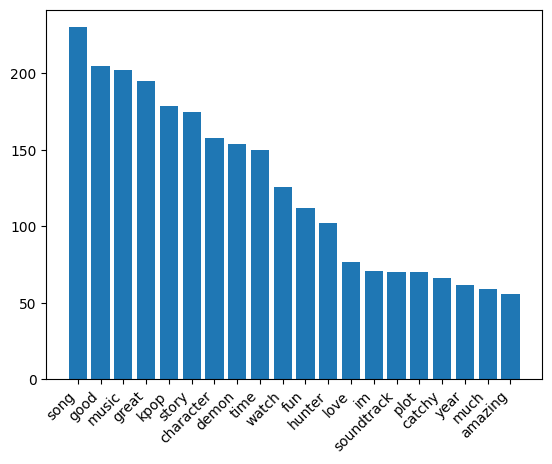

In [50]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

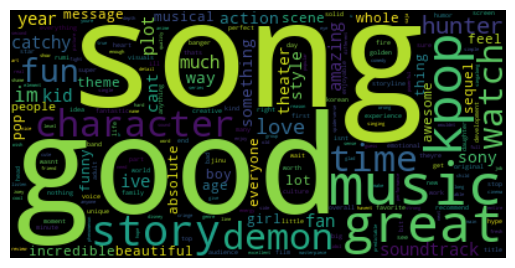

In [51]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# --- 이 부분은 이미 구현하셨습니다 ---
# 1. 품사 필터링과 표제어 추출까지 모두 마친,
#    최종 토큰 리스트가 담긴 컬럼을 준비합니다.
# 예: df_review['final_tokens'] = result


# --- 바로 이 부분을 수정해야 합니다 ---

# 2. CountVectorizer가 '이미 정제된 토큰'을 입력받는다고 알려줍니다.
vectorizer = CountVectorizer(
    tokenizer=lambda x: x,  # 토큰 리스트를 그대로 사용
    lowercase=False,         # 직접 소문자화 했으므로 비활성화
    max_features=100
    # 참고: stop_words는 이미 이전 단계에서 직접 제거했으므로,
    # 이 단계에서는 생략해도 괜찮습니다.
)

# 3. 원본 텍스트('review_text') 대신,
#    최종 정제된 토큰('final_tokens') 컬럼을 입력합니다.
reviews_cv = vectorizer.fit_transform(df['lemmatized_tokens'])


# --- 결과 확인 ---
print(f"\n벡터 크기: {reviews_cv.shape}")
print(f"특성(단어) 개수: {len(vectorizer.get_feature_names_out())}")
print(f"\n상위 20개 특성:")
print(vectorizer.get_feature_names_out()[:20])


벡터 크기: (797, 100)
특성(단어) 개수: 100

상위 20개 특성:
['absolute' 'absolutely' 'action' 'age' 'along' 'amazing' 'awesome'
 'beautiful' 'best' 'better' 'boy' 'cant' 'catchy' 'character' 'culture'
 'definitely' 'demon' 'enjoy' 'enjoyed' 'even']


c:\openCV\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lambda x: x,
    lowercase=False,
    max_features=100
)

reviews_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_tokens'])

print(f"\n벡터 크기: {reviews_tfidf.shape}")
print(f"특성(단어) 개수: {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"\n상위 20개 특성 (TF-IDF 기준):")
print(tfidf_vectorizer.get_feature_names_out()[:20])


벡터 크기: (797, 100)
특성(단어) 개수: 100

상위 20개 특성 (TF-IDF 기준):
['absolute' 'absolutely' 'action' 'age' 'along' 'amazing' 'awesome'
 'beautiful' 'best' 'better' 'boy' 'cant' 'catchy' 'character' 'culture'
 'definitely' 'demon' 'enjoy' 'enjoyed' 'even']


In [ ]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect

# CSV 파일 읽기
df = pd.read_csv('.data/kpop_audience_reviews.csv')

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

# 영어 리뷰만 필터링
df['language'] = df['review_text'].apply(detect_language)
df_review = df[df['language'] == 'en'].copy()
print(f"영어 리뷰: {len(df_review)}개")

# Stopwords 설정
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'animation', 'movies', 'animated']
stop_words.update(extra_stop_words)

# 전처리 함수
lemmatizer = WordNetLemmatizer()
my_tag_set = {'NN', 'NNS', 'NNP', 'NNPS'}

def preprocess_text(text):
    # 1. 소문자 변환 및 특수문자 제거 (영문자, 숫자, 공백만 유지)
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())
    
    # 2. 토큰화
    tokens = word_tokenize(text)
    
    # 3. Stopwords 제거 및 길이 필터링
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]
    
    # 4. Lemmatization (표제어 추출)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # 5. POS Tagging & 필터링
    pos_tags = pos_tag(lemmatized_tokens)
    final_tokens = [token for token, tag in pos_tags if tag in my_tag_set]
    
    return final_tokens

df_review['final_tokens'] = df_review['review_text'].apply(preprocess_text)


vectorizer_config = {
    'tokenizer': lambda x: x,
    'lowercase': False,
    'max_features': 500
}

# CountVectorizer 실행
cv = CountVectorizer(**vectorizer_config)
cv_matrix = cv.fit_transform(df_review['final_tokens'])
cv_top_features = cv.get_feature_names_out()

# TfidfVectorizer 실행
tfidf = TfidfVectorizer(**vectorizer_config)
tfidf_matrix = tfidf.fit_transform(df_review['final_tokens'])
tfidf_top_features = tfidf.get_feature_names_out()


# --- 5. 결과 출력 ---
print("\n--- 최종 정제된 토큰 상위 키워드 비교 ---")
print("\n[CountVectorizer 결과 (단순 빈도)]")
print(cv_top_features[:20])

print("\n[TfidfVectorizer 결과 (중요도)]")
print(tfidf_top_features[:20])

영어 리뷰: 800개

--- 최종 정제된 토큰 상위 키워드 비교 ---

[CountVectorizer 결과 (단순 빈도)]
['absolute' 'acceptance' 'acclaim' 'account' 'act' 'action' 'adult' 'age'
 'alright' 'amazing' 'amount' 'animation' 'anime' 'anyone' 'anything'
 'appeal' 'appelhans' 'appreciate' 'arc' 'art']

[TfidfVectorizer 결과 (중요도)]
['absolute' 'acceptance' 'acclaim' 'account' 'act' 'action' 'adult' 'age'
 'alright' 'amazing' 'amount' 'animation' 'anime' 'anyone' 'anything'
 'appeal' 'appelhans' 'appreciate' 'arc' 'art']


c:\openCV\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [55]:
# CountVectorizer가 계산한 첫 번째 리뷰의 벡터 값
print("\n[CountVectorizer의 첫 리뷰 벡터 값 (상위 20개)]")
print(cv_matrix[0].toarray()[:, :20])

# TfidfVectorizer가 계산한 첫 번째 리뷰의 벡터 값
print("\n[TfidfVectorizer의 첫 리뷰 벡터 값 (상위 20개)]")
print(tfidf_matrix[0].toarray()[:, :20])


[CountVectorizer의 첫 리뷰 벡터 값 (상위 20개)]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

[TfidfVectorizer의 첫 리뷰 벡터 값 (상위 20개)]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [56]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from langdetect import detect
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

id2word = corpora.Dictionary(df_review['final_tokens'])

corpus = [id2word.doc2bow(tokens) for tokens in df_review['final_tokens']]

# LDA 모델 생성
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100, # 결과 재현성을 위한 설정
    update_every=1,
    chunksize=100,
    passes=10, # 전체 코퍼스를 몇 번 반복 학습할지 결정
    alpha='auto',
    per_word_topics=True
)

print("LDA 모델 학습이 완료되었습니다.")


# --- 4. 결과 확인 및 시각화 ---

# 4-1. 텍스트로 토픽 확인
print("\n--- 각 토픽별 주요 단어 ---")
topics = lda_model.print_topics(num_words=10) # 각 토픽별로 10개 단어 출력
for topic in topics:
    print(topic)

# 4-2. pyLDAvis를 사용한 인터랙티브 시각화
print("\nLDA 시각화 데이터를 생성하고 'lda_visualization.html' 파일로 저장합니다.")
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis_data

LDA 모델 학습이 완료되었습니다.

--- 각 토픽별 주요 단어 ---
(0, '0.062*"visuals" + 0.060*"k-pop" + 0.049*"endeavor" + 0.049*"basic" + 0.049*"sheen" + 0.049*"particular" + 0.049*"outsider" + 0.049*"sensitivity" + 0.048*"struggle" + 0.040*"story"')
(1, '0.076*"everything" + 0.071*"bit" + 0.067*"star" + 0.027*"character" + 0.018*"watch" + 0.016*"humor" + 0.015*"head" + 0.014*"title" + 0.013*"one" + 0.012*"development"')
(2, '0.070*"music" + 0.066*"song" + 0.055*"story" + 0.040*"time" + 0.037*"film" + 0.036*"character" + 0.033*"cast" + 0.027*"fun" + 0.024*"soundtrack" + 0.023*"plot"')
(3, '0.121*"demon" + 0.114*"hunter" + 0.072*"kpop" + 0.050*"music" + 0.047*"action" + 0.037*"comedy" + 0.036*"sing" + 0.035*"dance" + 0.034*"cry" + 0.010*"girl"')
(4, '0.031*"something" + 0.028*"style" + 0.025*"theater" + 0.023*"world" + 0.019*"kind" + 0.019*"everyone" + 0.015*"moment" + 0.014*"storyline" + 0.013*"fan" + 0.013*"masterpiece"')

LDA 시각화 데이터를 생성하고 'lda_visualization.html' 파일로 저장합니다.


c:\openCV\myenv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.301702 -0.068278       1        1  39.009939
3      0.062933  0.328022       2        1  19.528273
4     -0.025042  0.023694       3        1  15.699360
1     -0.285356  0.026123       4        1  15.337567
0     -0.054237 -0.309561       5        1  10.424861, topic_info=           Term        Freq       Total Category  logprob  loglift
28        demon  154.000000  154.000000  Default  30.0000  30.0000
219      hunter  144.000000  144.000000  Default  29.0000  29.0000
13   everything   76.000000   76.000000  Default  28.0000  28.0000
3          song  169.000000  169.000000  Default  27.0000  27.0000
33         kpop   99.000000   99.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
440       piece    2.026599    2.766816   Topic5  -5.8115   1.9496
522        stop    2.018812    2.769051   Topic5  -5.8153   1.9450
11        story   26.949476  169.497170   Topic5  -3.2238   0.4221
718         top    2.419267    3.980127   Topic5  -5.6343   1.7631
95          way    4.186147   30.452961   Topic5  -5.0860   0.2766

[214 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
346       3  0.921395  acting
19        2  0.901936  action
19        3  0.076435  action
160       1  0.938888   adult
43        1  0.995794     age
...     ...       ...     ...
238       3  0.863380    word
109       3  0.963833   world
96        4  0.955838     wow
129       1  0.997816    year
97        4  0.886082    zoey

[203 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 2, 1])